In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})

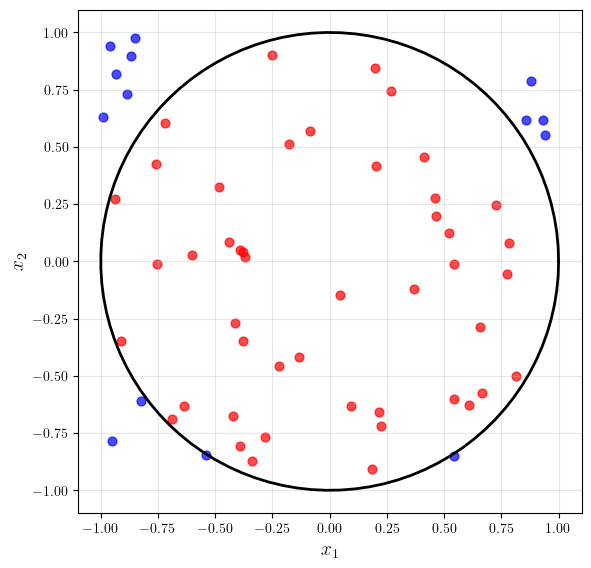

In [2]:


np.random.seed(42)
M = 60
x = 2 * np.random.rand(M, 2) - 1

inside = (x[:, 0]**2 + x[:, 1]**2) < 1

fig, ax = plt.subplots(figsize=(6, 6))
theta = np.linspace(0, 2*np.pi, 100)
ax.plot(np.cos(theta), np.sin(theta), 'k-', lw=2)
ax.scatter(x[inside, 0], x[inside, 1], c='red', s=40, alpha=0.7)
ax.scatter(x[~inside, 0], x[~inside, 1], c='blue', s=40, alpha=0.7)
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_aspect('equal')
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("../../../figs/monte_carlo/mc_circle.pdf", bbox_inches="tight")
plt.show()

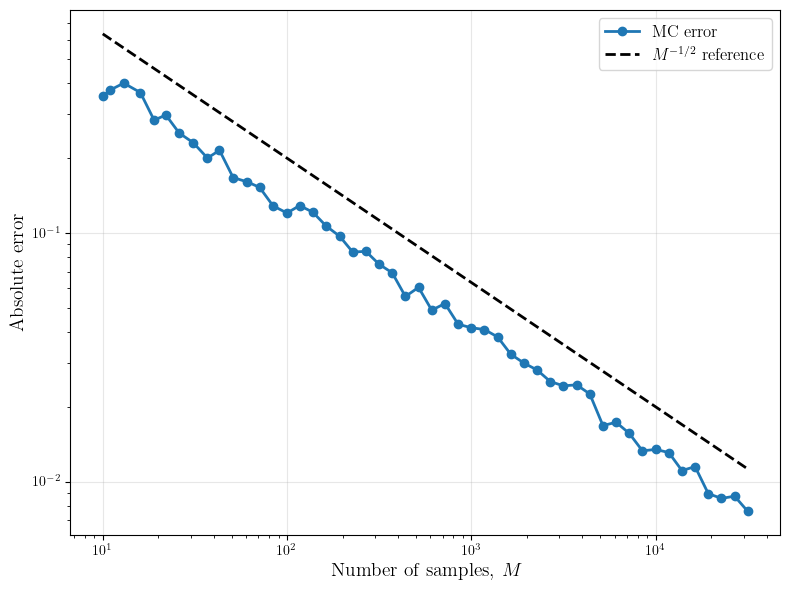

In [ ]:
np.random.seed(42)
M_values = np.logspace(1, 4.5, 50).astype(int)
n_trials = 100
errors = np.zeros((len(M_values), n_trials))

for i, M in enumerate(M_values):
    for j in range(n_trials):
        x = 2 * np.random.rand(M, 2) - 1
        f = (x[:, 0]**2 + x[:, 1]**2) < 1
        I = 4 * np.mean(f)
        errors[i, j] = np.abs(I - np.pi)

mean_error = np.mean(errors, axis=1)

fig, ax = plt.subplots(figsize=(8, 6))
ax.loglog(M_values, mean_error, 'o-', label='MC error', lw=2)
ax.loglog(M_values, 2/np.sqrt(M_values), 'k--', 
          label='$M^{-1/2}$ reference', lw=2)
ax.set_xlabel('Number of samples, $M$', fontsize=14)
ax.set_ylabel('Absolute error', fontsize=14)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../../../figs/monte_carlo/mc_convergence.pdf', bbox_inches="tight")
plt.show()

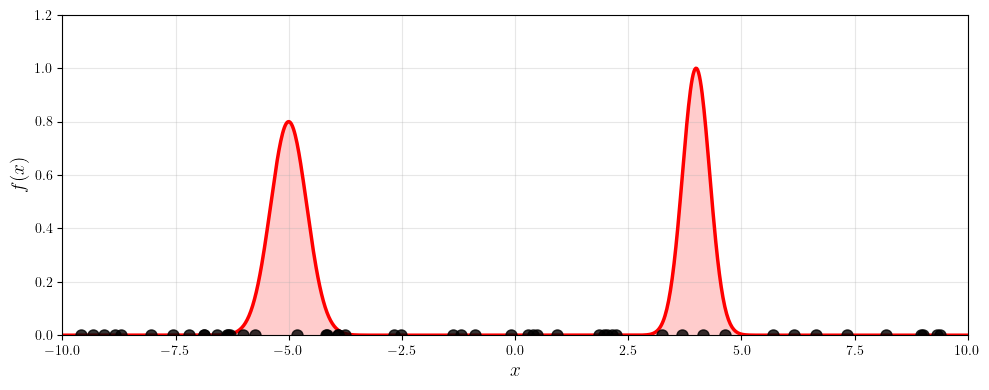

In [ ]:
x = np.linspace(-10, 10, 1000)
f = np.exp(-0.5*((x-4)/0.3)**2) + 0.8*np.exp(-0.5*((x+5)/0.4)**2)

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x, f, 'r-', lw=2.5)
ax.fill_between(x, 0, f, alpha=0.2, color='red')

np.random.seed(42)
samples = np.random.uniform(-10, 10, 50)
ax.plot(samples, np.zeros_like(samples), 'ko', markersize=8, alpha=0.8)

ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('$f(x)$', fontsize=14)
ax.set_xlim(-10, 10)
ax.set_ylim(0, 1.2)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../../../figs/monte_carlo/uniform_sampling_problem.pdf')
plt.show()